In [22]:
print('reset variables')

%reset -f

reset variables


In [23]:
print('import packages')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

import packages


In [24]:
print('define minmax function')

def minmax1(x,xmin,xmax):
    return np.minimum(np.maximum(x,xmin),xmax)

def minmax(x,xmin,L):
    return np.minimum(np.maximum(x,xmin),xmin+np.abs(L))

def smooth_minmax(x,xmin,L):
    return 1

define minmax function


In [25]:
print('define synthetic functions & dataset')

Nvar=2
Nb=7
b_ref=[1,0.1,0.2,0.3,0.4,0,0]
b_ref=np.random.rand(Nb)
b=np.random.rand(Nb)

Nx=1000
x=np.random.rand(Nx,Nvar)

x1=np.random.rand(Nx)
x2=np.random.rand(Nx)
x=np.c_[x1, x2]

def func_synth(x):
    return -0.2-0.3*minmax(x[:,0],0.1,0.9)+0.4*minmax(x[:,1],0,0.5)

def func_tes1(b,x):
    x1=x[:,0]
    x2=x[:,1]
    temp=b[0]
    temp+=-b[1]*minmax(x1,b[2],b[3])
    temp+=b[4]*minmax(x1,-b[5],b[6])*np.cos(x1)
    temp=temp+x2*0.01
    return temp

def func_test2(b,x):
    x1=x[:,0]
    x2=x[:,1]
    i=3
    if i==0:
        temp=b[0]
        temp+=b[1]*x1+b[2]*x2
        temp+=b[3]*x1*x1+b[4]*x2*x2
        temp+=b[5]*np.sqrt(x1)+b[6]*np.sqrt(x2)
    if i==1:
        temp=b[0]
        temp+=b[1]*x1+b[2]*abs(x1-b[3])
        temp+=b[4]*x1*x1+b[5]*x1*abs(x1-b[6])
    elif i==2:
        temp=b[0]
        temp+=b[1]*minmax(x1,b[2],b[3])
        temp+=b[4]*minmax(x1,b[5],b[6])
    elif i==3:
        temp=b[0]+b[1]*np.tanh(b[2]*x1+b[3])+b[4]*np.tanh(b[5]*x1+b[6])
    return temp


y=func_synth(x)
y=func_tes1(b_ref,x)
y_hat=func_test2(b,x)



define synthetic functions & dataset


In [26]:
print('Table. Range of input & output variables')

x1min=min(x1)
x1max=max(x1)
x1_avg=np.average(x1)
x1_std=np.std(x1)

x2min=min(x2)
x2max=max(x2)
x2_avg=np.average(x2)
x2_std=np.std(x2)

ymin=min(y)
ymax=max(y)
y_avg=np.average(y)
y_std=np.std(y)

df1=np.array \
([[x1min,x1max,x1_avg,x1_std] \
,[x2min,x2max,x2_avg,x2_std] \
,[ymin,ymax,y_avg,y_std]])

df1=np.round(df1,3)
df1=pd.DataFrame(np.transpose(df1))

str_='Range of variables'
df1.columns=[[str_,str_,str_],['x1','x2','y']]
df1.index=['min', 'max', 'avg', 'std'] #row names


display(df1)

Table. Range of input & output variables


Range of variables              
                    x1     x2      y
min              0.002  0.000  0.132
max              1.000  1.000  0.439
avg              0.491  0.509  0.339
std              0.287  0.285  0.095

Figure. Box plot of input & output variables


<IPython.core.display.Javascript object>


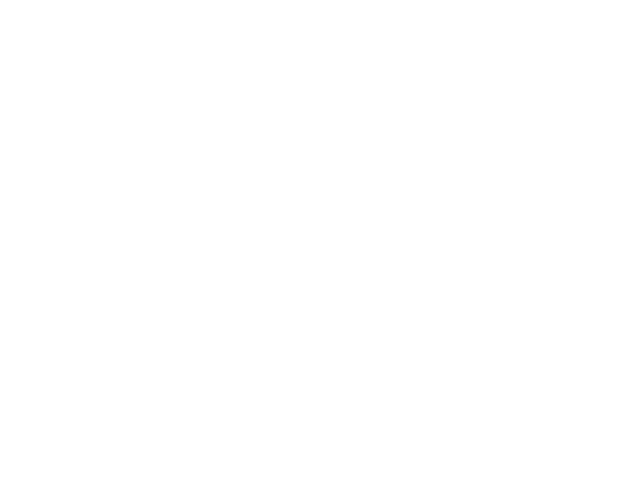

In [27]:
print('Figure. Box plot of input & output variables')

data=np.c_[x1,x2,y]

fig,ax= plt.subplots()
plt.boxplot(data)
plt.title('Box plot of input (x) & output (y) variables')
plt.xlabel('Variable')
plt.ylabel('Values')
ax.set_xticklabels(labels=['x1','x2','y'])
plt.show()


Figure. Scatter plot of y versus input variables x1 & x2


<IPython.core.display.Javascript object>


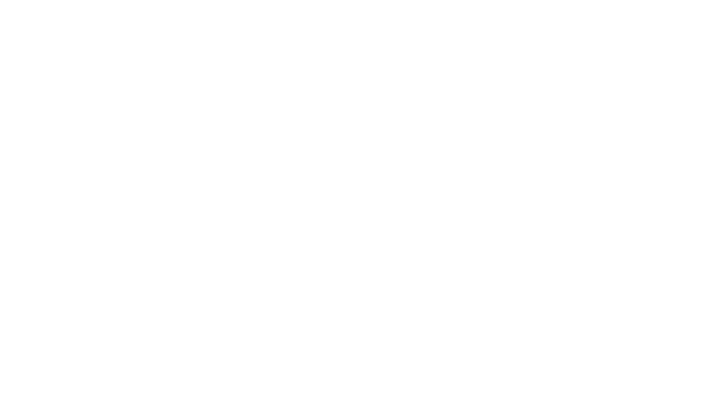

In [28]:
print('Figure. Scatter plot of y versus input variables x1 & x2')

fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)


ax1.scatter(x1,y,s=10, marker='o')
ax2.scatter(x2,y,s=10, marker='o')

ax1.set_title('y vs. x1')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

ax2.set_title('y vs. x2')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

fig.set_size_inches(18/2.54,10/2.54)

plt.show()

In [29]:
print('delta kroneker vector')
def func_kron(Nb,i):
    b=np.zeros(Nb)
    b[i]=1
    return b

print('SumSquareError calculation') 

def sqe_(b,x,y):
    yhat=func_test2(b,x)
    return sum((yhat-y)*(yhat-y))    
    
print('Err_vector calc')
def err(y,yhat):
    err=yhat-y
    return sum(err*err)

delta kroneker vector
SumSquareError calculation
Err_vector calc


In [30]:
print('setting for optimization')


dxx=0.01
print('finite difference step size, dxx=',dxx)



N_linesearch=5
print('number of iterations for line search, N_linesearch = ', N_linesearch)

print('number of iterations before changing from steepest descent to hessian = ', 10)
N_start_hessian=10

print('number of iterations between updating Hessian matrix = ', 5)
dN_hessian=5





setting for optimization
finite difference step size, dxx= 0.01
number of iterations for line search, N_linesearch =  5
number of iterations before changing from steepest descent to hessian =  10
number of iterations between updating Hessian matrix =  5


In [31]:
print('initialize some empty vectors & matrix for optimization')

ynew=np.zeros(Nx)
yup=np.zeros(Nx)
ydown=np.zeros(Nx)
ymid=np.zeros(Nx)

b_new=np.zeros(Nb)
dx=np.zeros(Nb)
dxold=np.zeros(Nb)
dy=np.zeros(Nb)
dyy=np.zeros(Nb)

H=np.zeros((Nb,Nb))

yup=0
ymid=0
ydown=0
err0=0

initialize some empty vectors & matrix for optimization


In [32]:
def func_gradient_fd(b, Nb, dxx):
    #initialize vectors
    dx=np.zeros(Nb)
    dy=np.zeros(Nb)
    dyy=np.zeros(Nb)
    #calculate
    for i in range(Nb):
        #create perturbation input vectors
        bpp=b+2*dxx*func_kron(Nb,i)
        bp=b+dxx*func_kron(Nb,i)
        bn=b-dxx*func_kron(Nb,i)
        bnn=b-2*dxx*func_kron(Nb,i)
        
        #calculate square error for nodes
        sqe_00=sqe_(b,x,y)
        sqe_pp=sqe_(bpp,x,y)
        sqe_p=sqe_(bp,x,y)
        sqe_n=sqe_(bn,x,y)
        sqe_nn=sqe_(bnn,x,y)

        #calculate gradient with finite difference formula
        dy[i]=(sqe_p-sqe_n)/(2*dxx)
        dy[i]=(-sqe_pp+8*sqe_p-8*sqe_n+sqe_nn)/(12*dxx)
        dyy[i]=(sqe_p-2*sqe_00+sqe_n)/(dxx*dxx)
        dyy[i]=(-sqe_pp+16*sqe_p-30*sqe_00+16*sqe_n-sqe_nn)/(12*dxx*dxx)
        
        #avoid zero denominator
        if abs(dyy[i])<0.01:
            dyy[i]=0.01
            
        #normalize gradient
        dx[i]=-dy[i]/dyy[i]
    return (dx,dy,dyy)

In [33]:
print('function to calculate gradient vector with finite difference')
print('calculate gradient')
print('dy = db/dh gradient(b)')
print('dyy = d^2b/dh^2= diagonal element of d^2b/dh^2')
print('dx = -dy/dyy')
print('negative sign to move in the direction of decreasing gradient')

#use this syntax: 
dx,dy,dyy=func_gradient_fd(b,Nb,dxx)

print('\nfor example dx is calculated with this way:\n')
print(dx)

function to calculate gradient vector with finite difference
calculate gradient
dy = db/dh gradient(b)
dyy = d^2b/dh^2= diagonal element of d^2b/dh^2
dx = -dy/dyy
negative sign to move in the direction of decreasing gradient

for example dx is calculated with this way:

[-1.00008452 -1.30306895  1.09575008  0.78502949 -1.44952953  1.2214262
  0.87642843]


In [34]:
print('markdown below:')

markdown below:


<font color='red'>nice property of the gradient</font>

as you can see, we made a nice trick that creates really well behaved & scaled gradient values
because we calculated $y'/y"$ or $(dy/dx)/(d^2y/dx^2)$ which has units of $dx$)'

In [35]:
print('function to calculate hessian matrix with finite difference')

def func_hessian_fd(b, Nb, dxx):
    for i in range(Nb):
        for ii in range(Nb):
            #diagonals 
            if i==ii:
                bpp=b+2*dxx*func_kron(Nb,i)
                bp=b+dxx*func_kron(Nb,i)
                bn=b-dxx*func_kron(Nb,i)
                bnn=b-2*dxx*func_kron(Nb,i)

                sqe_00=sqe_(b,x,y)
                sqe_pp=sqe_(bpp,x,y)
                sqe_p=sqe_(bp,x,y)
                sqe_n=sqe_(bn,x,y)
                sqe_nn=sqe_(bnn,x,y)

                H[i,i]=(-sqe_pp+16*sqe_p-30*sqe_00+16*sqe_n-sqe_nn)/(12*dxx*dxx)
                
            #off diagonals
            elif ii<i:
                bpp=b+dxx*func_kron(Nb,i)+dxx*func_kron(Nb,ii)
                bnp=b-dxx*func_kron(Nb,i)+dxx*func_kron(Nb,ii)
                bpn=b+dxx*func_kron(Nb,i)-dxx*func_kron(Nb,ii)
                bnn=b-dxx*func_kron(Nb,i)-dxx*func_kron(Nb,ii)

                sqe_00=sqe_(b,x,y)
                sqe_pp=sqe_(bpp,x,y)
                sqe_pn=sqe_(bpn,x,y)
                sqe_np=sqe_(bnp,x,y)
                sqe_nn=sqe_(bnn,x,y)

                H[i,ii]=(sqe_pp+sqe_nn-sqe_pn-sqe_np)/(4*dxx*dxx)
                
            #symmetry
            else:
                H[i,ii]=H[ii,i]
    return H

function to calculate hessian matrix with finite difference


use this syntax to calculate Hessian


for example, first 3 rows of Hessian=


[1999.99999999    0.            0.        ]
[1531.04055037 1177.34844616    0.        ]
[ 199.94824944  519.25370035 -183.87383217]


as you can see, Hessian is diagonally dominated but not really


<IPython.core.display.Javascript object>


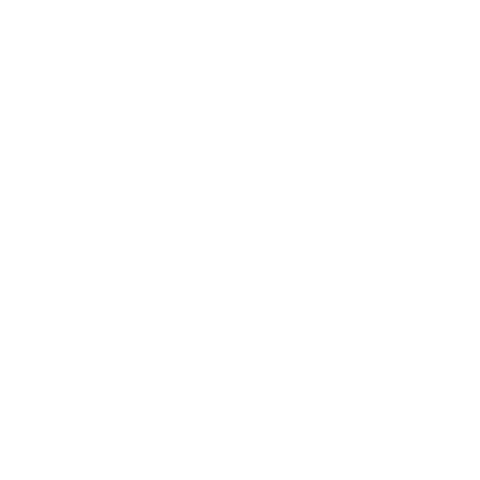

In [36]:
print('use this syntax to calculate Hessian')
H=func_hessian_fd(b, Nb, dxx)

print('\n')
print('for example, first 3 rows of Hessian=')
print('\n')

print(H[0,0:3])
print(H[1,0:3])
print(H[2,0:3])

print('\n')
print('as you can see, Hessian is diagonally dominated but not really')



plt.matshow(H)
plt.title('Hessian matrix visualization (d^2f/dbi dbj)')
plt.xlabel('i coef index')
plt.ylabel('j coef index')
plt.colorbar()
plt.show()

In [37]:
print('line search')
print('a constant momentum of 0.2 is used')
print('line search variable is coef which is halved if err_new<err_old does not become true')

def func_linesearch(b,x,y,dx,dxold,N_linesearch):
    
    coef=1
    momentum=0.2
    fail_=0
    
    for i in range(N_linesearch):
        b_new=b+coef*(dx+0.2*dxold)
        err0=sqe_(b,x,y)
        err1=sqe_(b_new,x,y)
        if err1<err0:
            break
        else:
            coef/=2
    return (b,b_new,err0,err1,coef)

#use this syntax:
b,b_new,err0,err1,coef=func_linesearch(b,x,y,dx,dxold,N_linesearch)

line search
a constant momentum of 0.2 is used
line search variable is coef which is halved if err_new<err_old does not become true


In [38]:
print('#the first few steps use steepest descent')
print('')

print('then Hessian is activated')
print('Hessian is not updates each iteration but rather every several iterations')
print('because H is costly to calculate')

print('invert Hessian:  HH=H^-1')
print()

print('matrix multiplication:')
print('dx = -H^-1 * Grad(b)')

print()
print('if error does not increase at the end of line search then convergence has stopped (fail variable)')

#the first few steps use steepest descent

then Hessian is activated
Hessian is not updates each iteration but rather every several iterations
because H is costly to calculate
invert Hessian:  HH=H^-1

matrix multiplication:
dx = -H^-1 * Grad(b)

if error does not increase at the end of line search then convergence has stopped (fail variable)


In [39]:
#for live plots


def function_plot_initialize():
    print('Figure. evolution of error')
    print('(a) error vs iter,')
    print('(b) scatter plot of y vs yhat,')
    print('(c) y & yhat vs x1,')
    print('(d) coef size vs iter.')
    
    fig = plt.figure()

    ax1= fig.add_subplot(221)
    ax2=fig.add_subplot(222)
    ax3=fig.add_subplot(223)
    ax4=fig.add_subplot(224)

    plt.ion()
    fig.show()
    fig.canvas.draw()
    
    return (fig,ax1,ax2,ax3,ax4)

def function_plot(ax1,ax2,ax3,ax4,fig,iter_val,y,y_hat,iter_b_size):
    ax1.clear()
    ax1.set_title('(a)')
    ax1.set_xlabel('iter')
    ax1.set_ylabel('error')
    ax1.set_yscale('log')
    ax1.plot(iter_val)

    ax2.clear()
    ax2.set_title('(b)')
    ax2.set_xlabel('y')
    ax2.set_ylabel('yhat')        
    ax2.scatter(y,y_hat,s=5, marker='o')

    ax3.clear()
    ax3.set_title('(c)')
    ax3.set_xlabel('x1')
    ax3.set_ylabel('y or yhat')
    ax3.scatter(x[:,0],y)
    ax3.scatter(x[:,0],y_hat,s=5, marker='o') 

    ax4.clear()
    ax4.set_title('(d)')    
    ax4.set_xlabel('iter')
    ax4.set_ylabel('size coefs')
    ax4.plot(iter_b_size)

    fig.canvas.draw()
    

number of iterations, N_iter =  1001
reinitialize b coefficient vector to avoid getting stuck
Figure. evolution of error
(a) error vs iter,
(b) scatter plot of y vs yhat,
(c) y & yhat vs x1,
(d) coef size vs iter.


<IPython.core.display.Javascript object>


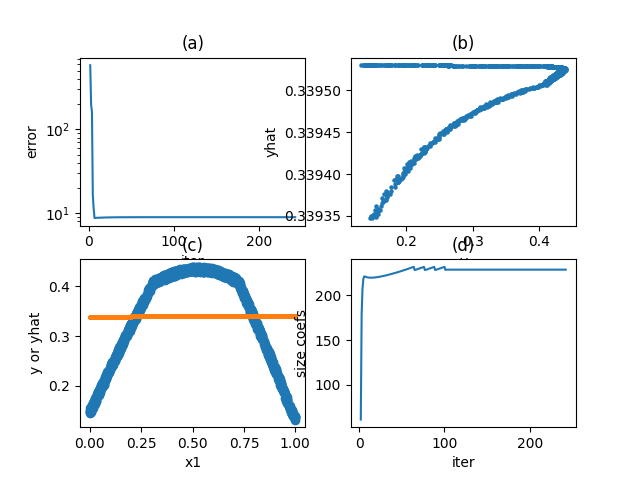

convergence stopped at iteration 258 ( 1001 )
end of calculations at 258 ( 1001 )


In [40]:
%matplotlib notebook

N_iter=1000+1
print('number of iterations, N_iter = ', N_iter)

iter_vec=[np.nan,np.nan]
iter_val=[np.nan,np.nan]
iter_b_size=[np.nan,np.nan]

print('reinitialize b coefficient vector to avoid getting stuck')
b=np.random.rand(Nb)


(fig,ax1,ax2,ax3,ax4)=function_plot_initialize()

stop_=0
dxold=np.zeros(Nb)

for j in range(N_iter):
    b_new=b
    
    if j>1:
        dxold=dx+0
        
    dx,dy,dyy=func_gradient_fd(b,Nb,dxx) #gradient

    if j>=100 and np.mod(j,3)==5: 
        H=func_hessian_fd(b, Nb, dxx)
        #HH=np.linalg.inv(H)
    if j>100:
        dx=-np.linalg.solve(H,dy)
        #dx=-HH.dot(dy)
        
    b,b_new,err0,err1,coef=func_linesearch(b,x,y,dx,dxold,N_linesearch)
    
    if not(err1<err0-0.001):
        stop_+=1
        if stop_==250:
            print('convergence stopped at iteration',j,'(',N_iter,')')
            break
    
    b=b_new
    
    y_hat=func_test2(b,x) #errors
    iter_b_size=np.append(iter_b_size,sum(b*b)) #sumsq of coefs
    iter_vec=np.append(iter_vec,j) #append iter number
    iter_val=np.append(iter_val,err0) #append error
    
    if j==0 or np.mod(j,20)==0:
        function_plot(ax1,ax2,ax3,ax4,fig,iter_val,y,y_hat,iter_b_size)


print('end of calculations at',j,'(',N_iter,')')        
        
#toggle scrolling from #cell menu

    

ideas for surrogate optimization

generate 100 samples

select 3 best ones

using the existing points, determine derivative direction

for this purpose, use SPH style method

weight based on distance 

finite difference 

directional derivatives 

then do line search

after that repeat
